# AQI Across Indian Cities

##1.Introduction

- Objective: Analyze AQI trends across major Indian cities using Python.
- Dataset: Daily AQI records from 2015 to 2024.
- Cities: Delhi, Mumbai, Bangalore, Chennai, Kolkata.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

##2.Data Cleaning

- Loaded and cleaned missing AQI values.
- Constructed `year_month` datetime index.
- Filtered relevant columns for analysis.

###Load and inspect Data

In [242]:
#Load the Dataset
df=pd.read_csv('/content/city_day.csv')

#Preview the Dataset
print(df.head())
print()

#Checking shape and column
print()
print('Shape :',df.shape)
print()
print('Columns;',df.columns.tolist())
print()

#Checking Datatype
print(df.dtypes)
print()

#Checking for missing values
print(df.isnull().sum())
print()




        City    Datetime  PM2.5   PM10     NO   NO2    NOx   NH3    CO   SO2  \
0      Delhi  2015-01-01  153.3  241.7  182.9  33.0   81.3  38.5  1.87  64.5   
1     Mumbai  2015-01-01   70.5  312.7  195.0  42.0  122.5  31.5  7.22  83.8   
2    Chennai  2015-01-01  174.1  275.4   56.2  68.8  230.9  28.5  8.56  60.8   
3    Kolkata  2015-01-01  477.2  543.9   14.1  76.4  225.9  45.6  2.41  42.1   
4  Bangalore  2015-01-01  171.6  117.7  123.3  12.4   61.9  49.7  1.26  79.7   

      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0   83.6    18.93    20.81    8.32  204.5        Severe  
1  108.0     2.01    19.41    2.86   60.9  Satisfactory  
2   43.9    19.07    10.19    9.63  486.5        Severe  
3  171.1     9.31    11.65    9.39  174.4     Very Poor  
4  164.3     6.04    12.74    9.59  489.7          Good  


Shape : (18265, 16)

Columns; ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

C

The dataset contains data on air quality indices from major indian cities on a daily basis.

###Cleaning the Dataset

In [243]:

#Converting to date
df['date'] = pd.to_datetime(df['Datetime'])

#Extracting year and month
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month


#Cleaning columns
df.columns=[col.strip().lower() for col in df.columns]

#Check the cleaned Dataset
print(df.head)

<bound method NDFrame.head of             city    datetime  pm2.5   pm10     no    no2    nox   nh3    co  \
0          Delhi  2015-01-01  153.3  241.7  182.9   33.0   81.3  38.5  1.87   
1         Mumbai  2015-01-01   70.5  312.7  195.0   42.0  122.5  31.5  7.22   
2        Chennai  2015-01-01  174.1  275.4   56.2   68.8  230.9  28.5  8.56   
3        Kolkata  2015-01-01  477.2  543.9   14.1   76.4  225.9  45.6  2.41   
4      Bangalore  2015-01-01  171.6  117.7  123.3   12.4   61.9  49.7  1.26   
...          ...         ...    ...    ...    ...    ...    ...   ...   ...   
18260      Delhi  2024-12-31  371.2   61.7   14.6  130.7  159.1  45.9  7.02   
18261     Mumbai  2024-12-31  180.2  259.3  181.9   50.7  135.7  22.4  8.85   
18262    Chennai  2024-12-31  188.6  434.4   68.8  126.1  142.7  47.0  8.30   
18263    Kolkata  2024-12-31  343.0  458.6  106.7  108.3  137.8  22.6  2.11   
18264  Bangalore  2024-12-31  121.9  100.0   37.7  118.5  224.8  32.6  9.89   

        so2     o3  b



*   After cleaning the data, it is being found that 10 year air quality data have been obtained for further research.




##3.Exploratory Analysis

###AQI in Indian Cities

In [244]:
def classify_aqi(aqi):
    if pd.isna(aqi):
        return 'Unknown'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'


df['AQI_Category'] = df['aqi'].apply(classify_aqi)

In [245]:
# Defining Filters
target_cities= ['Chennai','Mumbai', 'Delhi','Kolkata','Bangalore']
target_pollutant=['pm2.5','so2','no2']

#df_pollutant_filter :
df_filtered = df[df['city'].isin(target_cities)]

# Grouping the data
df_grouped = df_filtered.groupby(['city', 'year', 'month']).agg({'aqi': 'mean'}).rename(columns={'aqi': 'average aqi'}).reset_index()

print(df_grouped)


          city  year  month  average aqi
0    Bangalore  2015      1   249.022581
1    Bangalore  2015      2   236.503571
2    Bangalore  2015      3   246.629032
3    Bangalore  2015      4   246.720000
4    Bangalore  2015      5   249.077419
..         ...   ...    ...          ...
595     Mumbai  2024      8   278.348387
596     Mumbai  2024      9   275.503333
597     Mumbai  2024     10   226.909677
598     Mumbai  2024     11   228.620000
599     Mumbai  2024     12   239.145161

[600 rows x 4 columns]


###Most polluted Indian City

In [246]:
# Filtering out the most polluted Indian City
df_maxpollution = df.groupby('city')['aqi'].max().reset_index()
df_maxpollution = df_maxpollution.sort_values(by='aqi', ascending=False)
print(df_maxpollution)

        city    aqi
4     Mumbai  500.0
0  Bangalore  499.9
2      Delhi  499.9
3    Kolkata  499.9
1    Chennai  499.8


Key Observations

	•	Mumbai has the highest AQI at 500.0, reaching the upper extreme of most AQI scales — indicating hazardous air quality.
	•	Bangalore, Delhi, Kolkata follow closely with 499.9, showing no significant improvement in air quality and also falling into the hazardous category.
	•	Chennai, although marginally lower at 499.8, is still within the severely polluted range.








Inference:

All five cities are experiencing critically hazardous air quality levels, with negligible differences in AQI values. This suggests a widespread regional air pollution crisis rather than a localized issue. Immediate public health advisories and emission control interventions are required across these urban centers.


###Impact of pollution metrics on AQI

In [247]:
# Getting columns except AQI
features = df.select_dtypes(include='number').columns.drop(['aqi','year','month'])

# Get list of unique cities
cities = df['city'].unique()

# Empty list to store correlation data
correlation_data=[]

# Loop through city and calculate correlation
for city in cities:
    city_data = df[df['city'] == city]
    corr_dict = {'city': city}
    for feature in features:
        corr_value = city_data['aqi'].corr(city_data[feature])
        corr_dict[feature] = corr_value
    correlation_data.append(corr_dict)

# Creating final Dataframe
correlation_df = pd.DataFrame(correlation_data)
correlation_df.set_index('city', inplace=True)

# Getting max correlation value per parameter
max_values = correlation_df.max()

# Getting city name (row index) for each max value
max_cities = correlation_df.idxmax()

# Combine into a summary DataFrame
summary = pd.DataFrame({
    'Max Correlation': max_values,
    'City': max_cities
}).reset_index()

# Rename the default 'index' column to 'Feature'
summary = summary.rename(columns={'index': 'Feature'})

print(summary)


    Feature  Max Correlation       City
0     pm2.5         0.008110  Bangalore
1      pm10         0.030178    Chennai
2        no         0.029438      Delhi
3       no2         0.028986      Delhi
4       nox         0.015948  Bangalore
5       nh3         0.025895    Kolkata
6        co         0.024747  Bangalore
7       so2         0.029954  Bangalore
8        o3         0.013338  Bangalore
9   benzene         0.019884    Kolkata
10  toluene         0.021728     Mumbai
11   xylene         0.032400     Mumbai


In [248]:
# For each city (row), find the feature (column) with max correlation
max_feature = correlation_df.idxmax(axis=1)
max_corr = correlation_df.max(axis=1)

# Combine into a DataFrame
city_summary = pd.DataFrame({
    'City': correlation_df.index,
    'Top Feature': max_feature,
    'Max Correlation': max_corr
}).reset_index(drop=True)

print(city_summary)


        City Top Feature  Max Correlation
0      Delhi          no         0.029438
1     Mumbai      xylene         0.032400
2    Chennai        pm10         0.030178
3    Kolkata          no         0.026845
4  Bangalore         so2         0.029954


Key Observations:

	•	Nitric Oxide (NO) shows the highest correlation with AQI in Delhi and Kolkata, indicating that traffic emissions and incomplete combustion sources may be significant contributors to poor air quality in these cities.
	•	Mumbai shows the strongest (though still weak) correlation between Xylene and AQI (r ≈ 0.0324), pointing toward industrial or solvent emissions.
	•	Chennai’s AQI correlates most with PM10, highlighting the role of dust and fine particulate pollution, common in coastal and urbanizing regions.
	•	Bangalore shows a weak association with SO₂, suggesting possible links to vehicular emissions, diesel combustion, or coal-burning activities.
	•	All correlation values are below 0.04, indicating no strong linear dependence between any single feature and AQI.




Final Inference:

Although all correlations are weak, some pollutants appear more relevant in certain cities:

	•	NO (Nitric Oxide) in Delhi and Kolkata signals traffic-related pollution
	•	Xylene in Mumbai suggests industrial VOCs
	•	PM10 in Chennai points to dust or particulates
	•	SO₂ in Bangalore indicates combustion sources

These results imply that while no single pollutant dominates, city-specific factors influence AQI differently, and further multivariate or nonlinear modeling is required to better understand and predict air quality patterns.


### AQI Ranking

In [249]:
# Group
city_year_avg = df.groupby(['city', 'year'])['aqi'].mean().reset_index()

# Step 2: Rank cities within each year (lower AQI = better rank)
city_year_avg['rank'] = city_year_avg.groupby('year')['aqi'].rank(method='min', ascending=True)

# Pivot
pivot = city_year_avg.pivot(index='year', columns='city', values='rank')
print(pivot)
print()

# Pollution score index
for city in pivot.columns:
    print(f"Pollution score index {city}: {pivot[city].sum()}")
print()
print('Higher Pollution Score Index is Better')
print()

city  Bangalore  Chennai  Delhi  Kolkata  Mumbai
year                                            
2015        1.0      4.0    3.0      2.0     5.0
2016        5.0      4.0    3.0      2.0     1.0
2017        1.0      5.0    3.0      2.0     4.0
2018        2.0      4.0    1.0      3.0     5.0
2019        3.0      1.0    4.0      5.0     2.0
2020        5.0      2.0    1.0      3.0     4.0
2021        1.0      4.0    5.0      3.0     2.0
2022        5.0      1.0    3.0      2.0     4.0
2023        1.0      2.0    5.0      3.0     4.0
2024        1.0      4.0    2.0      5.0     3.0

Pollution score index Bangalore: 25.0
Pollution score index Chennai: 31.0
Pollution score index Delhi: 30.0
Pollution score index Kolkata: 30.0
Pollution score index Mumbai: 34.0

Higher Pollution Score Index is Better



Key Insights:

	•	Mumbai ranks highest with a PSI of 34, indicating the most consistently better air quality among the five cities across 2015–2024.
	•	Chennai, Delhi, and Kolkata are close in mid-range, suggesting moderate performance with year-to-year fluctuations.
	•	Bangalore has the lowest PSI (25), showing it ranked poorly in multiple years, implying consistently worse air quality over the past decade.
	•	Notably, Delhi — typically known for hazardous air — seems to have ranked better than Bangalore and at par with Kolkata, perhaps due to improvement in recent years or relative spikes in pollution elsewhere.




### AQI Categorising

In [250]:
# Categorising days with AQI
category_counts = df.groupby(['city', 'AQI_Category']).size().unstack().fillna(0)
print(category_counts)

AQI_Category  Good  Moderate  Poor  Satisfactory  Severe  Very Poor
city                                                               
Bangalore      382       724   742           356     738        711
Chennai        365       738   730           361     766        693
Delhi          364       703   746           368     714        758
Kolkata        352       734   741           371     740        715
Mumbai         349       736   686           366     752        764




*   In the past decade, only one in ten days have been linked to a good AQI which is a issue of concern.




Final Inference:

Over a 10-year span, Mumbai has had the best air quality on average, while Bangalore consistently performed the worst among the five metros in India. The data suggests that long-term trends, rather than one-time events, are shaping the relative air quality profile of these cities. Policy attention may be especially needed for Bangalore, which shows persistently lower rankings.


## 4.Plotting

### AQI variation over time across major Indian cities

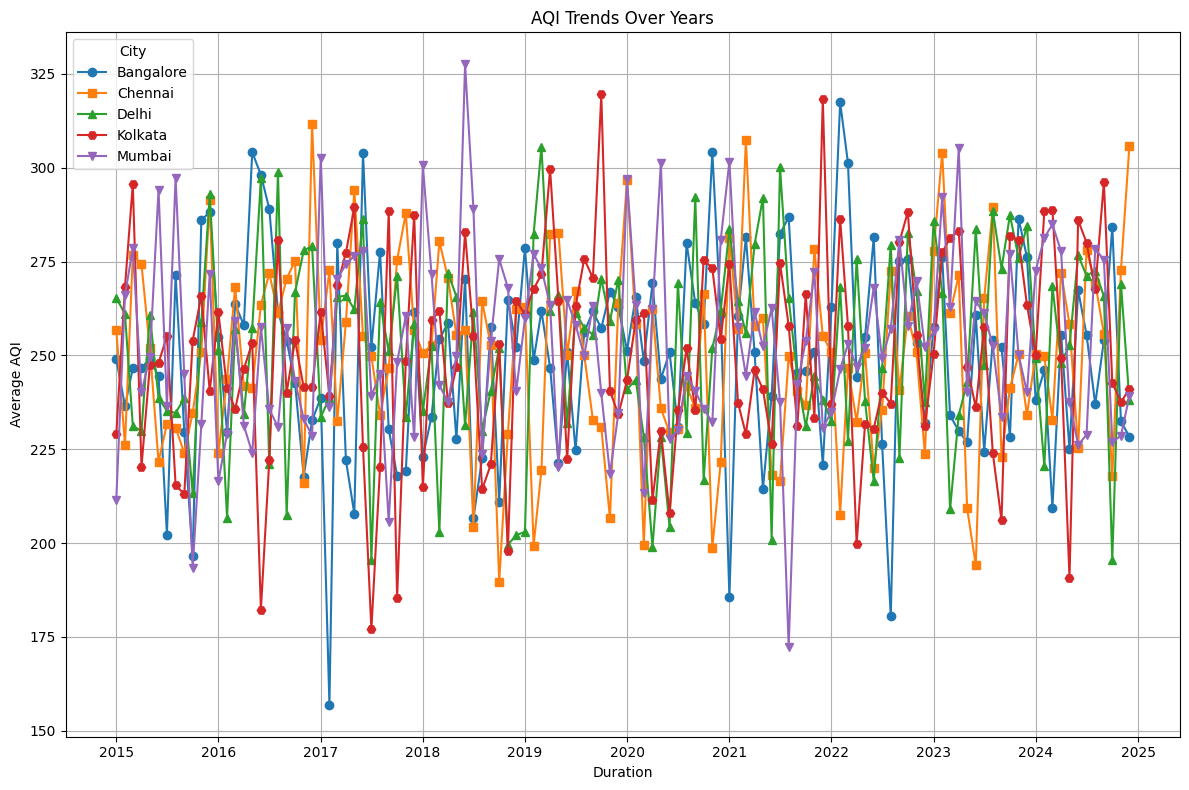

In [251]:

# Group
df_grouped['year_month'] = pd.to_datetime(df_grouped[['year', 'month']].assign(day=1))

# Pivoting the table
pivoted = df_grouped.pivot(index='year_month', columns='city', values='average aqi')

# Plotting the chart
plt.figure(figsize=(12, 8))
marker=['o','s','^','H', 'v']

for i, city in enumerate(pivoted.columns):
    plt.plot(pivoted.index, pivoted[city], label=city, marker=marker[i % len(marker)])

plt.title('AQI Trends Over Years')
plt.xlabel('Duration')
plt.ylabel('Average AQI')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:

	1.	Frequent and Sharp Fluctuations Across All Cities
	•	The AQI lines are jagged and volatile for every city, indicating rapid month-to-month changes in air quality.
	•	This reflects the influence of short-term pollution events, such as seasonal festivals, crop burning, traffic surges, or weather shifts.
	2.	Delhi and Kolkata Show Repeated High Spikes
	•	Both cities frequently touch or exceed the 300 AQI mark, entering the “Very Unhealthy” to “Hazardous” category.
	•	Likely causes include stubble burning (Delhi) and high industrial emissions or poor ventilation (Kolkata) during specific months.
	3.	Mumbai’s AQI is Volatile but More Moderate
	•	Despite occasional peaks, Mumbai stays mostly in the moderate to unhealthy range, perhaps due to coastal airflow moderating pollution.
	4.	Chennai Shows Some Consistency
	•	Chennai experiences fewer extreme spikes, maintaining relatively stable air quality, though still not consistently “good.”
	5.	Bangalore Performs Inconsistently
	•	While Bangalore avoids extreme spikes, it often stays in the middle range (~250–280), suggesting persistent moderate pollution, possibly from traffic or urban construction.


Final Inference:

The plot reveals that air quality across Indian metros is highly unstable, with Delhi and Kolkata experiencing the worst spikes. Mumbai, though variable, stays relatively moderate, while Chennai shows the most consistent trend. Bangalore lingers in a moderate pollution zone without significant highs or lows. These trends emphasize the need for city-specific, dynamic pollution control strategies and continuous monitoring systems.


### Heat Map

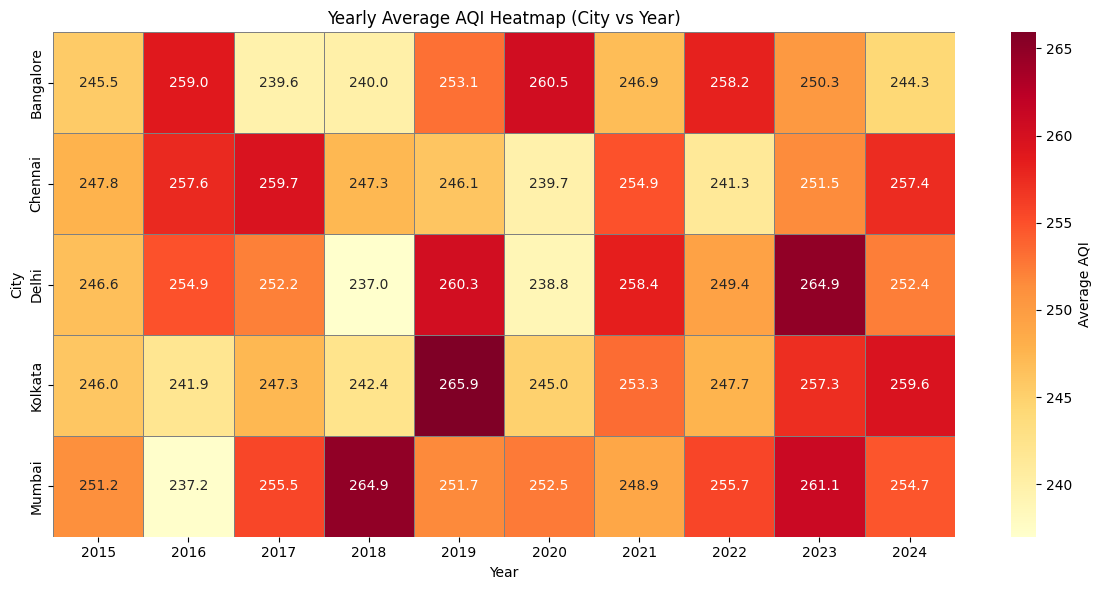

In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing AQI values
df_filtered = df.dropna(subset=['aqi'])

# Group by year and city, compute mean AQI
yearly_avg = df_filtered.groupby(['year', 'city'])['aqi'].mean().reset_index()

# Pivot to get cities as rows, years as columns
yearly_pivot = yearly_avg.pivot(index='city', columns='year', values='aqi')

# Plot and save the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    yearly_pivot, annot=True, fmt=".1f", cmap='YlOrRd',
    linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'Average AQI'}
)

plt.title('Yearly Average AQI Heatmap (City vs Year)')
plt.xlabel('Year')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

🔍 Key Observations:

1. Delhi and Kolkata Experience Highest Yearly AQI Spikes
	•	Delhi peaked in 2019 and 2023 (260.3 and 264.9).
	•	Kolkata hit its highest in 2019 and 2024 (265.9 and 259.6).
	•	These values are in the “Unhealthy” range, suggesting chronic pollution issues.

2. Mumbai Shows Consistent High Values
	•	Mumbai had high AQI almost every year (>250 in 7 out of 10 years).
	•	2018 marked its worst year with 264.9, possibly due to a sharp rise in vehicular or industrial emissions.

3. Chennai Is Volatile
	•	Chennai’s AQI jumped in 2016–2017 (257.6 and 259.7), dropped in 2020, and rose again by 2024.
	•	Implies seasonal or inconsistent pollution drivers — possibly industrial cycles or meteorological shifts.

4. Bangalore Is the Least Polluted Overall
	•	Bangalore shows comparatively lower yearly AQI, with multiple years below 245 (e.g., 2017, 2018, 2024).
	•	Suggests marginally better baseline air quality, though still not “Good”.

5. Year 2020 Shows Relative Drop Across Most Cities
	•	Most cities show slightly better AQI in 2020, likely reflecting COVID-19 lockdown effects (reduced traffic and emissions).




Final Insights:

The heatmap confirms that Delhi, Kolkata, and Mumbai experience the most sustained air quality issues, while Bangalore retains a slight edge with relatively better air. 2020 shows a system-wide dip, reinforcing the influence of anthropogenic activity. Pollution control strategies need to be tailored city-wise and be able to respond to year-to-year volatility.
# New Section

###Histogram

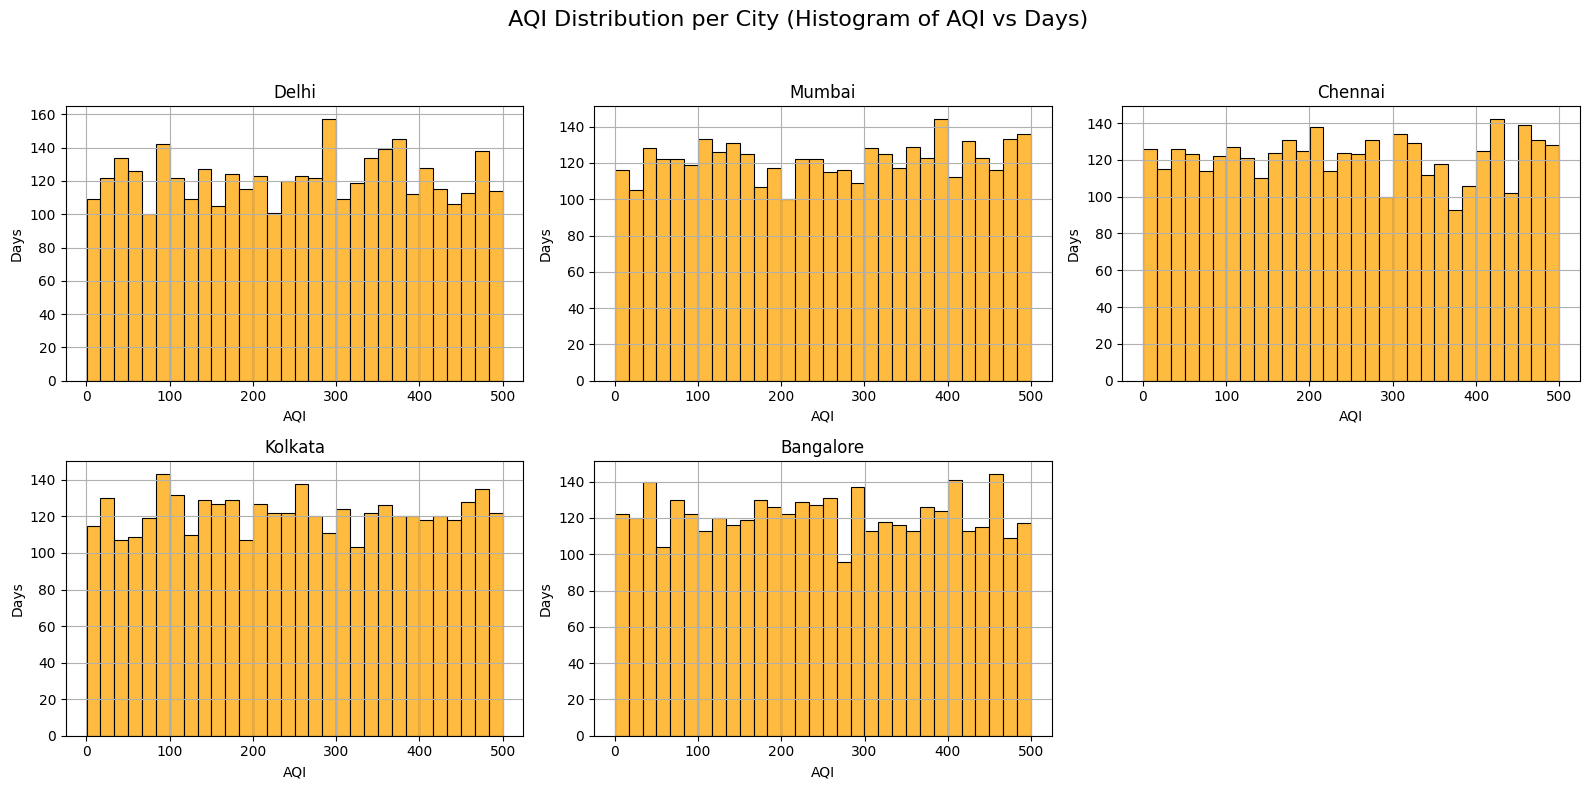

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of cities
cities = df['city'].unique()

# Set up the figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

# Plot one histogram per city
for i, city in enumerate(cities):
    city_data = df[df['city'] == city]['aqi'].dropna()
    sns.histplot(city_data, bins=30, kde=False, ax=axes[i], color='orange', edgecolor='black')
    axes[i].set_title(f"{city}")
    axes[i].set_xlabel("AQI")
    axes[i].set_ylabel("Days")
    axes[i].grid(True)

# Hide any unused subplots if <6 cities
for j in range(len(cities), len(axes)):
    fig.delaxes(axes[j])

# Overall title
plt.suptitle(" AQI Distribution per City (Histogram of AQI vs Days)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Observations by City:

1. Delhi

	•	Distribution is fairly uniform with a slight peak around 300–350.

	•	AQI spans across the full range (0–500).

	•	Suggests frequent extreme pollution events as well as clean days.

	•	Notable tail on higher AQI values, hinting at persistent hazardous periods.

2. Mumbai

	•	More even distribution than Delhi.

	•	Slight clustering between 100–300, fewer days with AQI > 400.

	•	Indicates moderate to unhealthy air most of the time, but rarely hazardous.

3. Chennai

	•	Distribution has a peak in the mid-range (200–300).

	•	Fewer extremely low or high AQI days.

	•	Shows steady moderate pollution, with rare spikes or clean periods.

4. Kolkata

	•	Broader spread with a few dips, but relatively centered around 100–300.

	•	Suggests frequent fluctuation between acceptable and unhealthy AQI.

	•	Mild right skew, pointing to occasional high pollution days.

5. Bangalore

	•	Surprisingly wide spread with consistent frequencies from AQI 0 to 500.

	•	Most bins have 100–140 days — no dominant AQI range.

	•	Reflects a chaotic air quality profile — Bangalore may have inconsistent pollution sources or measurement variability.

General Insights:

	•	All cities show significant variability, with no city maintaining consistently “Good” air.
	•	Delhi and Bangalore experience the widest AQI fluctuations, including extreme values.
	•	Mumbai and Chennai hover more in the middle range, implying moderate but persistent pollution.
	•	These histograms support the idea that urban air quality in India is unpredictable, with most cities toggling between moderate and unhealthy zones frequently.

##5.Final Insights




- Delhi shows the highest seasonal AQI spikes, especially during winter months.
- AQI in most cities fluctuates between Moderate to Unhealthy levels frequently.
- Mumbai maintains relatively stable AQI with fewer extreme pollution spikes.
- Bangalore displays a chaotic spread across all AQI levels, possibly indicating variability in measurement or sources.
- 2020 showed a drop in AQI across cities — likely due to lockdowns.
- Xylene and NO appear weakly correlated with AQI in Mumbai and Delhi respectively, but multivariate effects dominate.